In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline
plt.style.use("seaborn")

data = pd.read_csv('./Desktop/Metis Final Project/Phishing_Legitimate_full.csv')

data.head()

In [3]:
data.shape

(10000, 50)

In [4]:
data.describe()

id       NumDots  SubdomainLevel     PathLevel     UrlLength  \
count  10000.00000  10000.000000    10000.000000  10000.000000  10000.000000   
mean    5000.50000      2.445100        0.586800      3.300300     70.264100   
std     2886.89568      1.346836        0.751214      1.863241     33.369877   
min        1.00000      1.000000        0.000000      0.000000     12.000000   
25%     2500.75000      2.000000        0.000000      2.000000     48.000000   
50%     5000.50000      2.000000        1.000000      3.000000     62.000000   
75%     7500.25000      3.000000        1.000000      4.000000     84.000000   
max    10000.00000     21.000000       14.000000     18.000000    253.000000   

            NumDash  NumDashInHostname      AtSymbol   TildeSymbol  \
count  10000.000000       10000.000000  10000.000000  10000.000000   
mean       1.818000           0.138900      0.000300      0.013100   
std        3.106258           0.545744      0.017319      0.113709   
min        0.000000           0.000000      0.000000      0.000000   
25%        0.000000           0.000000      0.000000      0.000000   
50%        0.000000           0.000000      0.000000      0.000000   
75%        2.000000           0.000000      0.000000      0.000000   
max       55.000000           9.000000      1.000000      1.000000   

       NumUnderscore  ...  IframeOrFrame  MissingTitle  ImagesOnlyInForm  \
count    10000.00000  ...   10000.000000   10000.00000      10000.000000   
mean         0.32320  ...       0.339600       0.03220          0.030400   
std          1.11466  ...       0.473597       0.17654          0.171694   
min          0.00000  ...       0.000000       0.00000          0.000000   
25%          0.00000  ...       0.000000       0.00000          0.000000   
50%          0.00000  ...       0.000000       0.00000          0.000000   
75%          0.00000  ...       1.000000       0.00000          0.000000   
max         18.00000  ...       1.000000       1.00000          1.000000   

       SubdomainLevelRT   UrlLengthRT  PctExtResourceUrlsRT  \
count      10000.000000  10000.000000          10000.000000   
mean           0.956600      0.020200              0.353300   
std            0.248037      0.820036              0.888908   
min           -1.000000     -1.000000             -1.000000   
25%            1.000000     -1.000000             -1.000000   
50%            1.000000      0.000000              1.000000   
75%            1.000000      1.000000              1.000000   
max            1.000000      1.000000              1.000000   

       AbnormalExtFormActionR  ExtMetaScriptLinkRT  \
count            10000.000000         10000.000000   
mean                 0.793200             0.173400   
std                  0.521019             0.755771   
min                 -1.000000            -1.000000   
25%                  1.000000             0.000000   
50%                  1.000000             0.000000   
75%                  1.000000             1.000000   
max                  1.000000             1.000000   

       PctExtNullSelfRedirectHyperlinksRT   CLASS_LABEL  
count                        10000.000000  10000.000000  
mean                             0.314100      0.500000  
std                              0.897843      0.500025  
min                             -1.000000      0.000000  
25%                             -1.000000      0.000000  
50%                              1.000000      0.500000  
75%                              1.000000      1.000000  
max                              1.000000      1.000000  

[8 rows x 50 columns]

In [5]:
data.isna().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [6]:
data.MissingTitle.sum()

322

In [7]:
data['InsecureForms'].sum()

8440

In [8]:
data.FrequentDomainNameMismatch.sum()

2153

In [9]:
data['RightClickDisabled'].sum()

140

In [10]:
# Cleaning Data

data['HttpsInHostname'].describe()

count    10000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: HttpsInHostname, dtype: float64

In [11]:
data.shape

(10000, 50)

In [12]:
data.drop('HttpsInHostname',
  axis='columns', inplace=True)
data.shape

(10000, 49)

In [13]:
data.drop('id',
  axis='columns', inplace=True)
data.shape

(10000, 48)

In [14]:
y = data['CLASS_LABEL']
x = data.iloc[:, 0:47]
x.head()

NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  NumDashInHostname  \
0        3               1          5         72        0                  0   
1        3               1          3        144        0                  0   
2        3               1          2         58        0                  0   
3        3               1          6         79        1                  0   
4        3               0          4         46        0                  0   

   AtSymbol  TildeSymbol  NumUnderscore  NumPercent  ...  SubmitInfoToEmail  \
0         0            0              0           0  ...                  0   
1         0            0              2           0  ...                  0   
2         0            0              0           0  ...                  0   
3         0            0              0           0  ...                  1   
4         0            0              0           0  ...                  0   

   IframeOrFrame  MissingTitle  ImagesOnlyInForm  SubdomainLevelRT  \
0              0             0                 1                 1   
1              0             0                 0                 1   
2              0             0                 0                 1   
3              0             0                 0                 1   
4              1             0                 0                 1   

   UrlLengthRT  PctExtResourceUrlsRT  AbnormalExtFormActionR  \
0            0                     1                       1   
1           -1                     1                       1   
2            0                    -1                       1   
3           -1                     1                       1   
4            1                    -1                       0   

   ExtMetaScriptLinkRT  PctExtNullSelfRedirectHyperlinksRT  
0                   -1                                   1  
1                    1                                   1  
2                   -1                                   0  
3                    1                                  -1  
4                   -1                                  -1  

[5 rows x 47 columns]

<BarContainer object of 10000 artists>

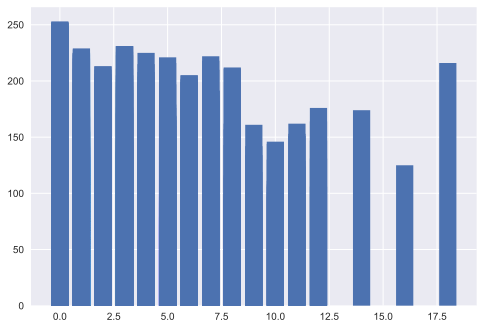

In [15]:
plt.bar(x['NumUnderscore'],x['UrlLength'])

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

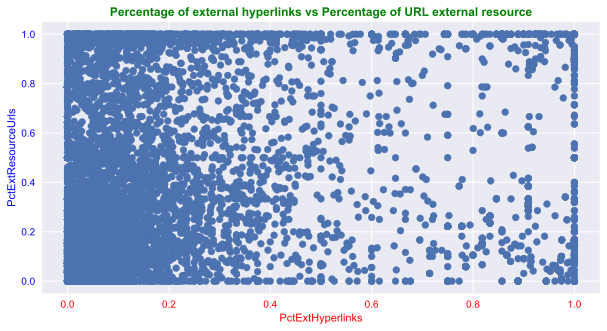

In [16]:
plt.figure(figsize=[10,5])
plt.scatter(x['PctExtHyperlinks'],x['PctExtResourceUrls']);
plt.title('Percentage of external hyperlinks vs Percentage of URL external resource', c = 'green', fontweight = 'bold')
plt.xlabel('PctExtHyperlinks', color = 'red')
plt.ylabel('PctExtResourceUrls', color = 'blue')
plt.xticks(color = 'red')
plt.yticks(color = 'blue')

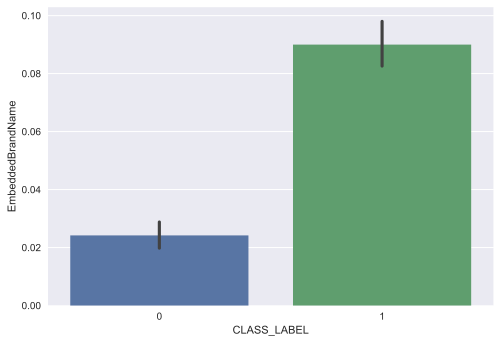

In [17]:
sns.barplot(x = 'CLASS_LABEL',y='EmbeddedBrandName',data = data);

In [18]:
# Linear Regression Algorithm


# w is a parameter with shape (1,50) because 49 is the number of existing features and 1 is for biasing
# x is the features with shape (10000, 50), one more column for biasing
# y has 10,000 observations with only 1 column
x_linear_regression = x
y_linear_regression = y

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression() # define an object

# fit features and output to the Linear Regression model
model.fit(x_linear_regression, y_linear_regression)

# get the w parameters 

w = np.concatenate([model.coef_, model.intercept_[None]])
# show the best w parameters which are the coefficients of the features
# and one more value of the biasing
# print('w is: ', w)
y_predicted = model.predict(x_linear_regression)

# # filtering the predicted output using numpy library
y_predicted = np.where( y_predicted5 >= 0.5, 1, y_predicted)
y_predicted = np.where(y_predicted < 0.5, 0, y_predicted)

r2_score(y_linear_regression, y_predicted)

0.7548

<AxesSubplot:>

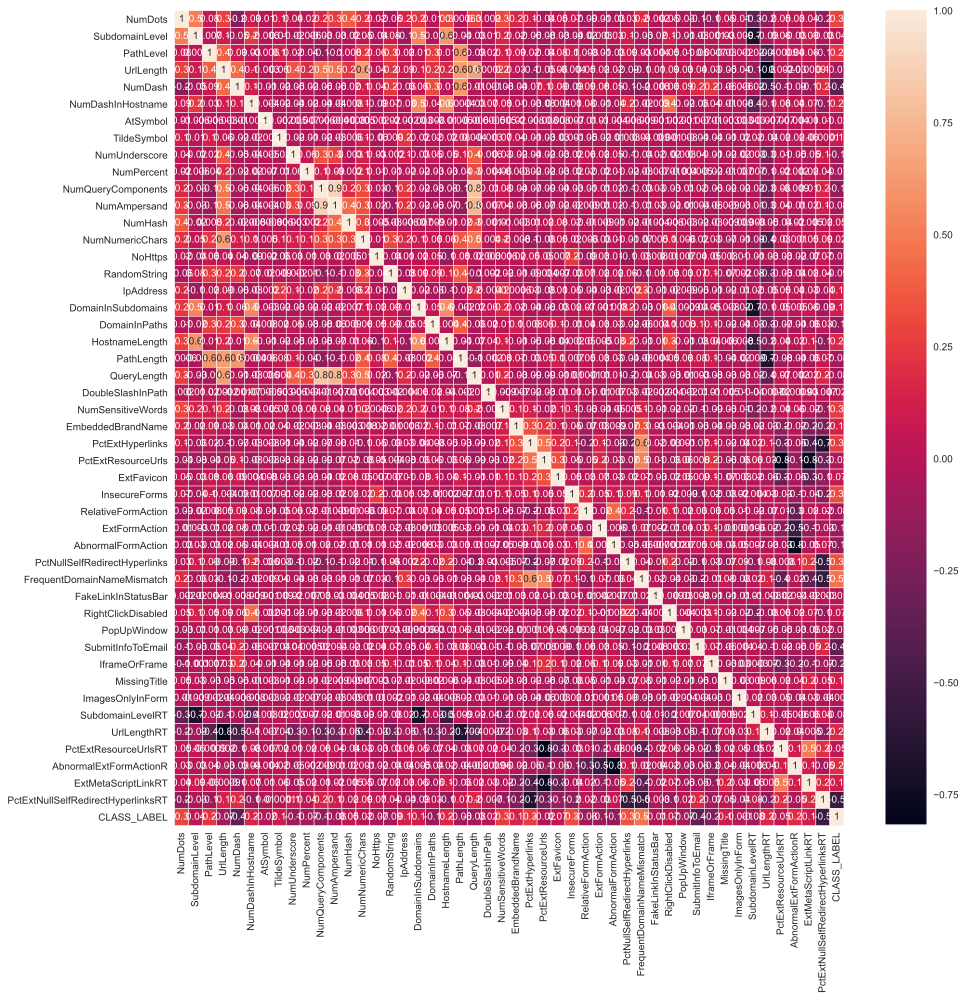

In [20]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax,fmt='0.1g')

Text(0, 0.5, 'Class Label')

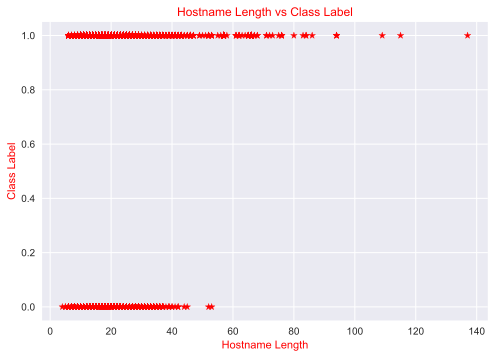

In [21]:
# Logistic Regression Algorithm

x_logistic_regression = x
y_logistic_regression = y

plt.scatter(data['HostnameLength'], data['CLASS_LABEL'], marker = '*', color = 'r')
plt.title('Hostname Length vs Class Label', color = 'r')
plt.xlabel('Hostname Length', c = 'r')
plt.ylabel('Class Label', c = 'r')

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [23]:
# train_test_split helps in splitting the data to training set and testing set
# for both the features and the output, test_size shows that 20% of the data is reserved
# for testing while 80% of the data is reserved for training the logistic regression model
# random state is controlling the shuffle and the value is 42 obtained from the notebook

X_train, X_test, y_train, y_test = train_test_split(x_logistic_regression, y_logistic_regression,
                                                    test_size = 0.2, random_state=42)

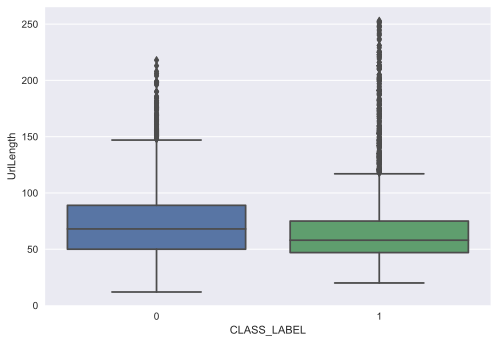

In [24]:
data_logistic_regression = X_train.copy()
data_logistic_regression['CLASS_LABEL'] = y

sns.boxplot(y='UrlLength', x='CLASS_LABEL', data=data_logistic_regression);

In [25]:
from sklearn.preprocessing import StandardScaler

# This code helps to scale input features both training and testing
# Therefore, we have mean 0 and std to be 1 by using numPy library

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
from sklearn.model_selection import GridSearchCV
parameter = { 'C': [0.1,1,10,100]}
classifier = LogisticRegression(max_iter=1000)
model = GridSearchCV(classifier, parameter)
model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100]})

In [27]:
from sklearn.metrics import accuracy_score

y_predict = model.predict(X_test)
score = accuracy_score(y_test, y_predict)
print('Accuracy of Logistic Regression is: ',score)

Accuracy of Logistic Regression is:  0.94


In [28]:
# KNN Algorithim
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [315]:
# train and split method
x_knn = x
y_knn = y

X_train, X_test, y_train, y_test = train_test_split(x_knn, y_knn, test_size = 0.20, random_state = 50)

In [29]:
# defining the KNN model

knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)
y_predicted = knn_model.predict(X_test)

print(metrics.accuracy_score(y_test, y_predicted))

0.9495


In [30]:
# using cross validation to enhance the output of the model

k_values = [5,20,30,50,100]
params = {
    'n_neighbors': k_values
}
grid = GridSearchCV(knn_model, params, cv = 10, scoring = 'accuracy')
grid.fit(X_train, y_train)
grid.best_score_

0.9493750000000001

In [31]:
# Decision Tree & Random Forests Algorithms

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

# max depth shows the maximum depth of the tree. Number 8 illustrates that there are 8 levels in the tree
# to reach pure leaves
decision_tree_model = DecisionTreeClassifier(max_depth = 8)

# Number of estimators defines the number of trees that allows aggregation
random_forest_model = RandomForestClassifier(n_estimators=90)

In [33]:
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=90)

In [34]:
decision_tree_model.score(X_test, y_test)

0.9636

In [35]:
random_forest_model.score(X_test, y_test)

0.9808